# ML Classification Algorithm

##  To classify the planets as Candidate/False positive/Confirmed 

### Required Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

### _dataset upload in pandas dataframe_

In [3]:
df = pd.read_csv("C:/Users/chand/OneDrive/Desktop/kepler_data.csv")


### _dataset's columns & column description_

In [4]:
pd.read_excel("C:/Users/chand/OneDrive/Desktop/Kepler data columns info.xlsx")

,Column Header,Column Description
0,kepid,KepID
1,kepoi_name,KOI Name
2,kepler_name,Kepler Name
3,koi_disposition,Exoplanet Archive Disposition
4,koi_pdisposition,Disposition Using Kepler Data
5,koi_score,Disposition Score
6,koi_fpflag_nt,Not Transit-Like False Positive Flag
7,koi_fpflag_ss,Stellar Eclipse False Positive Flag
8,koi_fpflag_co,Centroid Offset False Positive Flag
9,koi_fpflag_ec,Ephemeris Match Indicates Contamination False ...


### EDA (exploratory data analysis)

In [5]:
# Top 5 rows
df.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [6]:
print('shape of Dataset: ', df.shape)
print()
print('Dataset column name: ', df.columns)

shape of Dataset:  (9564, 49)

Dataset column name:  Index(['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')


#### dropping off the columns like 'kepoi_name', 'kepler_name', 'koi_pdisposition'

In [7]:
df2 = df.drop(['kepoi_name', 'kepler_name', 'koi_pdisposition'], axis=1)

In [8]:
print('shape of Dataset: ', df2.shape)
print()
print('Dataset column name: ', df2.columns)

shape of Dataset:  (9564, 46)

Dataset column name:  Index(['kepid', 'koi_disposition', 'koi_score', 'koi_fpflag_nt',
       'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period',
       'koi_period_err1', 'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')


In [9]:
# Top 5 rows
df2.head()

,kepid,koi_disposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,CONFIRMED,1.000,0,0,0,0,9.488036,2.780000e-05,-2.780000e-05,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,CONFIRMED,0.969,0,0,0,0,54.418383,2.480000e-04,-2.480000e-04,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,CANDIDATE,0.000,0,0,0,0,19.899140,1.490000e-05,-1.490000e-05,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,CONFIRMED,1.000,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9564 non-null   int64  
 1   koi_disposition    9564 non-null   object 
 2   koi_score          8054 non-null   float64
 3   koi_fpflag_nt      9564 non-null   int64  
 4   koi_fpflag_ss      9564 non-null   int64  
 5   koi_fpflag_co      9564 non-null   int64  
 6   koi_fpflag_ec      9564 non-null   int64  
 7   koi_period         9564 non-null   float64
 8   koi_period_err1    9110 non-null   float64
 9   koi_period_err2    9110 non-null   float64
 10  koi_time0bk        9564 non-null   float64
 11  koi_time0bk_err1   9110 non-null   float64
 12  koi_time0bk_err2   9110 non-null   float64
 13  koi_impact         9201 non-null   float64
 14  koi_impact_err1    9110 non-null   float64
 15  koi_impact_err2    9110 non-null   float64
 16  koi_duration       9564 

In [11]:
# null-value check by each column
df2.isnull().sum()

kepid                   0
koi_disposition         0
koi_score            1510
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       454
koi_period_err2       454
koi_time0bk             0
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_duration            0
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad              363
koi_prad_err1         363
koi_prad_err2         363
koi_teq               363
koi_teq_err1         9564
koi_teq_err2         9564
koi_insol             321
koi_insol_err1        321
koi_insol_err2        321
koi_model_snr         363
koi_tce_plnt_num      346
koi_tce_delivname     346
koi_steff             363
koi_steff_err1        468
koi_steff_err2        483
koi_slogg             363
koi_slogg_er

#### _dropping-off the null-columns ('koi_teq_err1', 'koi_teq_err2')_

In [12]:
df3 = df2.drop(['koi_teq_err1', 'koi_teq_err2'], axis=1)

In [13]:
print('shape of Dataset: ', df3.shape)
print()
print('Dataset column name: ', df3.columns)

shape of Dataset:  (9564, 44)

Dataset column name:  Index(['kepid', 'koi_disposition', 'koi_score', 'koi_fpflag_nt',
       'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period',
       'koi_period_err1', 'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_insol', 'koi_insol_err1',
       'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')


In [14]:
df3.isnull().sum()

kepid                   0
koi_disposition         0
koi_score            1510
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       454
koi_period_err2       454
koi_time0bk             0
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_duration            0
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad              363
koi_prad_err1         363
koi_prad_err2         363
koi_teq               363
koi_insol             321
koi_insol_err1        321
koi_insol_err2        321
koi_model_snr         363
koi_tce_plnt_num      346
koi_tce_delivname     346
koi_steff             363
koi_steff_err1        468
koi_steff_err2        483
koi_slogg             363
koi_slogg_err1        468
koi_slogg_err2        468
koi_srad    

#### replacing the null-value of numerical columns by its mean value

In [15]:
for col in df3.columns:
    if df3[col].dtype != object:
        df3[col].fillna(value=df3[col].mean(), inplace=True)

In [16]:
df3.isna().sum()

kepid                  0
koi_disposition        0
koi_score              0
koi_fpflag_nt          0
koi_fpflag_ss          0
koi_fpflag_co          0
koi_fpflag_ec          0
koi_period             0
koi_period_err1        0
koi_period_err2        0
koi_time0bk            0
koi_time0bk_err1       0
koi_time0bk_err2       0
koi_impact             0
koi_impact_err1        0
koi_impact_err2        0
koi_duration           0
koi_duration_err1      0
koi_duration_err2      0
koi_depth              0
koi_depth_err1         0
koi_depth_err2         0
koi_prad               0
koi_prad_err1          0
koi_prad_err2          0
koi_teq                0
koi_insol              0
koi_insol_err1         0
koi_insol_err2         0
koi_model_snr          0
koi_tce_plnt_num       0
koi_tce_delivname    346
koi_steff              0
koi_steff_err1         0
koi_steff_err2         0
koi_slogg              0
koi_slogg_err1         0
koi_slogg_err2         0
koi_srad               0
koi_srad_err1          0


### manipulation of categorical (feature) column ('koi_tce_delivname')

In [17]:
print('category present in column: ', df3['koi_tce_delivname'].unique())
print()
print('category-wise count: \n', df3['koi_tce_delivname'].value_counts())

category present in column:  ['q1_q17_dr25_tce' 'q1_q16_tce' nan 'q1_q17_dr24_tce']

category-wise count: 
 koi_tce_delivname
q1_q17_dr25_tce    8054
q1_q16_tce          796
q1_q17_dr24_tce     368
Name: count, dtype: int64


In [18]:
print('nan-value present in koi_tce_delivname column: ', df3['koi_tce_delivname'].isna().sum())

nan-value present in koi_tce_delivname column:  346


In [19]:
# dropping-off those nan-value from koi_tce_delivname column
df3.dropna(axis=0, inplace=True)

In [20]:
print('category present in column: ', df3['koi_tce_delivname'].unique())
print()
print('category-wise count for column: ', df3['koi_tce_delivname'].value_counts())

category present in column:  ['q1_q17_dr25_tce' 'q1_q16_tce' 'q1_q17_dr24_tce']

category-wise count for column:  koi_tce_delivname
q1_q17_dr25_tce    8054
q1_q16_tce          796
q1_q17_dr24_tce     368
Name: count, dtype: int64


In [21]:
encoded_data = pd.get_dummies(df3['koi_tce_delivname'], dtype=int, drop_first=True)

encoded_data

,q1_q17_dr24_tce,q1_q17_dr25_tce
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
9559,0,1
9560,0,1
9561,0,1
9562,0,1


In [22]:
df4 = pd.concat([df3, encoded_data], axis=1)
df4.shape

(9218, 46)

## manipulation of categorical (target) column ('koi_disposition')

In [23]:
df4['koi_disposition'].value_counts()

koi_disposition
FALSE POSITIVE    4564
CONFIRMED         2350
CANDIDATE         2304
Name: count, dtype: int64

In [24]:
le = LabelEncoder()

In [25]:
le.fit_transform(df4['koi_disposition'])

array([1, 1, 0, ..., 2, 0, 2])

In [26]:
df4['target_column'] = le.fit_transform(df4['koi_disposition'])

In [27]:
df4[['target_column', 'koi_disposition']].value_counts()

target_column  koi_disposition
2              FALSE POSITIVE     4564
1              CONFIRMED          2350
0              CANDIDATE          2304
Name: count, dtype: int64

### duplication-check

In [28]:
df4.duplicated().sum()

0

In [29]:
df4.shape

(9218, 47)

## preprocessing of data for ML Algorithm

### _training & testing datasets_

In [30]:
def train_test_dataset(non_feature_col, target_col, df):    
    
    X = df.drop(non_feature_col, axis=1)
    y = df[target_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)    
    
    return X_train, X_test, y_train, y_test  

In [31]:
non_feature_col = ['koi_disposition', 'koi_tce_delivname', 'target_column']
target_col = ['target_column']
df = df4

X_train, X_test, y_train, y_test = train_test_dataset(non_feature_col, target_col, df)

print('X-train Data: ', X_train.shape)
print('y-train Data: ', y_train.shape)
print('X-test Data: ', X_test.shape)
print('y-test Data: ', y_test.shape)

X-train Data:  (7374, 44)
y-train Data:  (7374, 1)
X-test Data:  (1844, 44)
y-test Data:  (1844, 1)


## ML Model & its parameters

In [32]:
def model_parameter(scale, model):
    
    pipeline = Pipeline([('scale', scale), ('model', model)])

    return pipeline, pipeline.get_params()

# RFC: Random Forest Classifier (model-1)

In [33]:
pipeline, pipeline_params = model_parameter(scale=StandardScaler(), model=RandomForestClassifier()) 

pipeline_params

{'memory': None,
 'steps': [('scale', StandardScaler()), ('model', RandomForestClassifier())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': RandomForestClassifier(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__bootstrap': True,
 'model__ccp_alpha': 0.0,
 'model__class_weight': None,
 'model__criterion': 'gini',
 'model__max_depth': None,
 'model__max_features': 'sqrt',
 'model__max_leaf_nodes': None,
 'model__max_samples': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__n_estimators': 100,
 'model__n_jobs': None,
 'model__oob_score': False,
 'model__random_state': None,
 'model__verbose': 0,
 'model__warm_start': False}

In [34]:
parameter = {
    'model__n_estimators': [10, 30, 50, 70, 100],
    'model__criterion': ['gini', 'entropy'],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5]
}

### GridSeach cross-validation for hyper-parameter tuning

In [35]:
classifier = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter,
                                cv=3, return_train_score=True)

In [36]:
classifier.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scale', StandardScaler()),
                                             ('model',
                                              RandomForestClassifier())]),
                   param_distributions={'model__criterion': ['gini', 'entropy'],
                                        'model__max_depth': [None, 10, 20],
                                        'model__min_samples_split': [2, 5],
                                        'model__n_estimators': [10, 30, 50, 70,
                                                                100]},
                   return_train_score=True)

### model metrics, confusion-matrix & classification report

In [37]:
y_pred = classifier.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9143167028199566

In [38]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[369,  94,  12],
       [ 46, 422,   3],
       [  1,   2, 895]], dtype=int64)

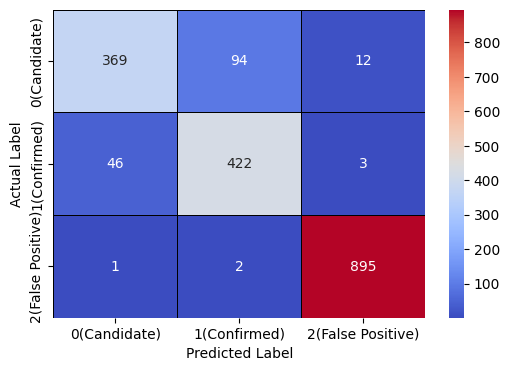

In [39]:
plt.figure(figsize=(6, 4))

sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d', lw=0.5, linecolor='black',
           xticklabels=['0(Candidate)', '1(Confirmed)', '2(False Positive)'],
           yticklabels=['0(Candidate)', '1(Confirmed)', '2(False Positive)'])

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

plt.show()

In [40]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83       475
           1       0.81      0.90      0.85       471
           2       0.98      1.00      0.99       898

    accuracy                           0.91      1844
   macro avg       0.90      0.89      0.89      1844
weighted avg       0.92      0.91      0.91      1844



### best estimator & corresponding parameters

In [41]:
cv_results = classifier.cv_results_
result_df = pd.DataFrame(cv_results)
result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,param_model__min_samples_split,param_model__max_depth,param_model__criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.297734,0.012285,0.005007,0.007081,10,2,None,entropy,"{'model__n_estimators': 10, 'model__min_sample...",0.879577,0.896257,0.886086,0.887307,0.006864,10,0.995321,0.993694,0.995728,0.994915,0.000879
1,0.706351,0.059240,0.020715,0.007659,30,2,None,gini,"{'model__n_estimators': 30, 'model__min_sample...",0.900325,0.904394,0.899919,0.901546,0.002021,7,0.998983,0.999797,0.999593,0.999458,0.000346
2,1.548888,0.125275,0.046630,0.013121,50,5,20,gini,"{'model__n_estimators': 50, 'model__min_sample...",0.900732,0.901546,0.901546,0.901275,0.000384,8,0.993491,0.993897,0.994915,0.994101,0.000599
3,3.748564,0.570340,0.106178,0.050768,100,2,None,gini,"{'model__n_estimators': 100, 'model__min_sampl...",0.908462,0.904801,0.907242,0.906835,0.001522,2,1.000000,1.000000,1.000000,1.000000,0.000000
4,2.669551,0.172606,0.068694,0.008822,50,5,10,gini,"{'model__n_estimators': 50, 'model__min_sample...",0.896257,0.897071,0.897884,0.897071,0.000664,9,0.946501,0.947315,0.944467,0.946094,0.001198
5,6.032830,0.137521,0.117790,0.017666,70,2,20,entropy,"{'model__n_estimators': 70, 'model__min_sample...",0.907242,0.906835,0.902360,0.905479,0.002212,4,1.000000,0.998779,1.000000,0.999593,0.000575
6,2.591325,0.123864,0.043046,0.008094,30,2,None,entropy,"{'model__n_estimators': 30, 'model__min_sample...",0.905207,0.902766,0.900325,0.902766,0.001993,5,0.999390,0.999593,0.999593,0.999525,0.000096
7,5.142927,0.143054,0.083137,0.022493,70,5,10,entropy,"{'model__n_estimators': 70, 'model__min_sample...",0.904394,0.902360,0.897884,0.901546,0.002719,6,0.947111,0.944060,0.944060,0.945077,0.001438
8,8.374042,0.267971,0.111407,0.011617,100,5,20,entropy,"{'model__n_estimators': 100, 'model__min_sampl...",0.907242,0.910903,0.901546,0.906564,0.003850,3,0.997762,0.997559,0.997762,0.997695,0.000096
9,8.762225,0.135028,0.142849,0.014642,100,2,None,entropy,"{'model__n_estimators': 100, 'model__min_sampl...",0.909276,0.908462,0.903987,0.907242,0.002325,1,1.000000,1.000000,1.000000,1.000000,0.000000


In [42]:
print('Best estimator: ', classifier.best_estimator_)
print()
print('Best value for corresponding parameter: ', classifier.best_params_)
print()
print('best model score: ', classifier.best_score_)

Best estimator:  Pipeline(steps=[('scale', StandardScaler()),
                ('model', RandomForestClassifier(criterion='entropy'))])

Best value for corresponding parameter:  {'model__n_estimators': 100, 'model__min_samples_split': 2, 'model__max_depth': None, 'model__criterion': 'entropy'}

best model score:  0.9072416598860862


# DTC: Decision Tree Classifier (model-2)

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
pipeline, pipeline_params = model_parameter(scale=StandardScaler(), model=DecisionTreeClassifier()) 

pipeline_params

{'memory': None,
 'steps': [('scale', StandardScaler()), ('model', DecisionTreeClassifier())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': DecisionTreeClassifier(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__ccp_alpha': 0.0,
 'model__class_weight': None,
 'model__criterion': 'gini',
 'model__max_depth': None,
 'model__max_features': None,
 'model__max_leaf_nodes': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__random_state': None,
 'model__splitter': 'best'}

In [45]:
parameter = {
    'model__criterion': ['gini', 'entropy'],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['auto', 'sqrt', 'log2', None]   
}

In [46]:
classifier = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter,
                                cv=3, return_train_score=True)

In [47]:
classifier.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scale', StandardScaler()),
                                             ('model',
                                              DecisionTreeClassifier())]),
                   param_distributions={'model__criterion': ['gini', 'entropy'],
                                        'model__max_depth': [None, 10, 20, 30],
                                        'model__max_features': ['auto', 'sqrt',
                                                                'log2', None],
                                        'model__min_samples_leaf': [1, 2, 4],
                                        'model__min_samples_split': [2, 5, 10]},
                   return_train_score=True)

In [48]:
y_pred = classifier.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.8915401301518439

In [49]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[350, 125,   0],
       [ 66, 402,   3],
       [  2,   4, 892]], dtype=int64)

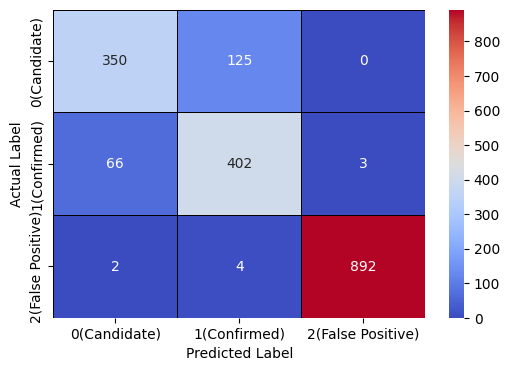

In [50]:
plt.figure(figsize=(6, 4))

sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d', lw=0.5, linecolor='black',
           xticklabels=['0(Candidate)', '1(Confirmed)', '2(False Positive)'],
           yticklabels=['0(Candidate)', '1(Confirmed)', '2(False Positive)'])

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

plt.show()

In [51]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.74      0.78       475
           1       0.76      0.85      0.80       471
           2       1.00      0.99      0.99       898

    accuracy                           0.89      1844
   macro avg       0.86      0.86      0.86      1844
weighted avg       0.89      0.89      0.89      1844



# SVC: Support Vector Classifier (model-3)

In [52]:
from sklearn.svm import SVC

In [53]:
pipeline, pipeline_params = model_parameter(scale=MinMaxScaler(), model=SVC()) 

pipeline_params

{'memory': None,
 'steps': [('scale', MinMaxScaler()), ('model', SVC())],
 'verbose': False,
 'scale': MinMaxScaler(),
 'model': SVC(),
 'scale__clip': False,
 'scale__copy': True,
 'scale__feature_range': (0, 1),
 'model__C': 1.0,
 'model__break_ties': False,
 'model__cache_size': 200,
 'model__class_weight': None,
 'model__coef0': 0.0,
 'model__decision_function_shape': 'ovr',
 'model__degree': 3,
 'model__gamma': 'scale',
 'model__kernel': 'rbf',
 'model__max_iter': -1,
 'model__probability': False,
 'model__random_state': None,
 'model__shrinking': True,
 'model__tol': 0.001,
 'model__verbose': False}

In [54]:
parameter = {
    'model__C': [0.1, 1, 10, 50, 100],
    'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'model__gamma': ['scale', 'auto', 0.1, 1],
    'model__degree': [2, 3, 4]
}

In [55]:
classifier = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter,
                                cv=3, return_train_score=True)

In [56]:
classifier.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scale', MinMaxScaler()),
                                             ('model', SVC())]),
                   param_distributions={'model__C': [0.1, 1, 10, 50, 100],
                                        'model__degree': [2, 3, 4],
                                        'model__gamma': ['scale', 'auto', 0.1,
                                                         1],
                                        'model__kernel': ['linear', 'poly',
                                                          'rbf', 'sigmoid']},
                   return_train_score=True)

In [57]:
y_pred = classifier.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.89587852494577

In [58]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[331, 144,   0],
       [ 40, 425,   6],
       [  1,   1, 896]], dtype=int64)

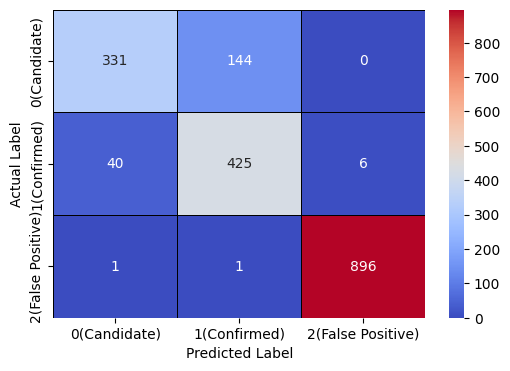

In [59]:
plt.figure(figsize=(6, 4))

sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d', lw=0.5, linecolor='black',
           xticklabels=['0(Candidate)', '1(Confirmed)', '2(False Positive)'],
           yticklabels=['0(Candidate)', '1(Confirmed)', '2(False Positive)'])

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

plt.show()

In [60]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.70      0.78       475
           1       0.75      0.90      0.82       471
           2       0.99      1.00      1.00       898

    accuracy                           0.90      1844
   macro avg       0.88      0.87      0.86      1844
weighted avg       0.90      0.90      0.89      1844



# KNN Classifier (model-4)

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
pipeline, pipeline_params = model_parameter(scale=MinMaxScaler(), model=KNeighborsClassifier()) 

pipeline_params

{'memory': None,
 'steps': [('scale', MinMaxScaler()), ('model', KNeighborsClassifier())],
 'verbose': False,
 'scale': MinMaxScaler(),
 'model': KNeighborsClassifier(),
 'scale__clip': False,
 'scale__copy': True,
 'scale__feature_range': (0, 1),
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 5,
 'model__p': 2,
 'model__weights': 'uniform'}

In [63]:
parameter = {
     'model__n_neighbors': [3, 5, 7, 9],
     'model__weights': ['uniform', 'distance'],
     'model__p': [1, 2]
}

In [64]:
classifier = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter,
                                cv=3, return_train_score=True)

In [65]:
classifier.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scale', MinMaxScaler()),
                                             ('model',
                                              KNeighborsClassifier())]),
                   param_distributions={'model__n_neighbors': [3, 5, 7, 9],
                                        'model__p': [1, 2],
                                        'model__weights': ['uniform',
                                                           'distance']},
                   return_train_score=True)

In [66]:
y_pred = classifier.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.8557483731019523

In [67]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[280, 195,   0],
       [ 60, 406,   5],
       [  4,   2, 892]], dtype=int64)

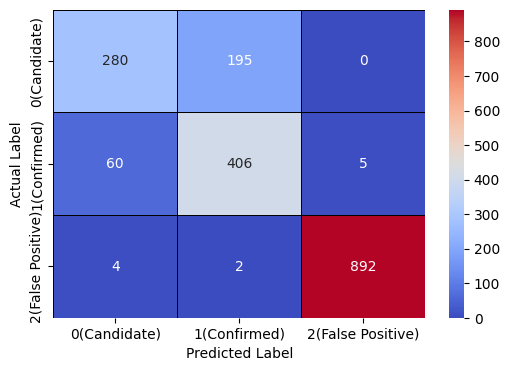

In [68]:
plt.figure(figsize=(6, 4))

sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d', lw=0.5, linecolor='black',
           xticklabels=['0(Candidate)', '1(Confirmed)', '2(False Positive)'],
           yticklabels=['0(Candidate)', '1(Confirmed)', '2(False Positive)'])

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

plt.show()

In [69]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.59      0.68       475
           1       0.67      0.86      0.76       471
           2       0.99      0.99      0.99       898

    accuracy                           0.86      1844
   macro avg       0.83      0.81      0.81      1844
weighted avg       0.87      0.86      0.85      1844



## Addition Questions

#### Q1. Why did you choose the particular algorithm?







I used the above-mentioned classification algorithms (RFC, DTC, SVC, and KNN Classifier) to classify planets as Candidate/False positive/Confirmed.

RFC & DTC (consider all features at one for a single path i.e easy to train as compared to random forest classifier) perform well in terms of:    

   * handling the non-linear complex datasets because of its tree like nature
   * handling the outliers (BUT, over-fitting should be taken care!)
  

Although training is more time consuming in RFC because of more computataion for multiple decision tree, I however chose RFC as my final model here because it produced the best metrics in every run.

#### Q2. What are the different tuning methods used for the algorithm?

Tuning hyperparameters is an important step in optimizing the performance of machine learning classifiers. Here are some popular tuning approaches for ML algorithms:

1. Grid Search

2. Random Search

3. Cross-Validation

4. Feature Engineering

5. Choosing proper learning rate


#### Q3. Did you consider any other choice of algorithm?Why or why not?

I chose the four different algorithm along with their different hyperparameter values to determine the best model.

I trained the model with Randomized Search & RFC performed well over other model.

Also, RFC can handel large non-linear complex datasets. It is more robust to noise & outlier because of averaging out the multiple trees. 

That's why RFC should be considered as the best model here!

#### Q4. What is the accuracy?

Accuracy: It is the ratio of number of correct predictions to the total number of input samples.

   * Accuracy = (TP + TN) / (TP + FP + FN + TN)
   * It works well for balanced datasets
    

#### Q5. What are the different types of metrics that can be used to evaluate the model?

1. Model Training Score: model.score(X_train, y_train)


2. Model Testing Score: model.score(X_test, y_test)
<br>

3. Precision: (Ratio of correctly classified positive samples to total number of classified positive samples)

     * Precision = TP / (TP+FP)            
     * Precision tells about, What proportion of positive identifications was actually correct.
<br> 


4. Recall: (ratio between the numbers of Positive samples correctly classified as Positive to the total number of Positive samples)

     * Recall = TP / (TP+FN)
     * Recall tells about, What proportion of actual positives was identified correctly?             
<br>


5. F1 Score: (harmonic mean of precision & recall)
               
     * F1-score = ( 2 * (precision * recall) / (precision + recall) )

<br>
TP: True Positive, FP: False Positive

FN: False Negative, TN: True Negative